# Physics Applications Part 5

## Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct
from scipy.fftpack import fft
from numpy.fft import rfft
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

## 1. Discrete cosine transform.


### a

Text(0.5, 0, '$\\nu$ (kHz)')

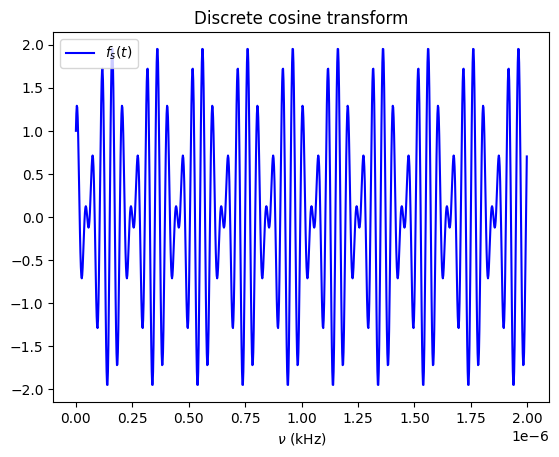

In [2]:
def fs(t):
  return np.sin(2*np.pi*nu1*t)+np.cos(2*np.pi*nu2*t)

nu1=20e3
nu2=25e3
N=1000
tau = 2e-6                       
t = np.linspace(0,(N-1)*tau,N)
f=fs(t)

plt.plot(t/1e3,f,'b',label=r'$f_s(t)$')
plt.legend()
plt.title('Discrete cosine transform')
plt.xlabel(r'$\nu$ (kHz)')


### b

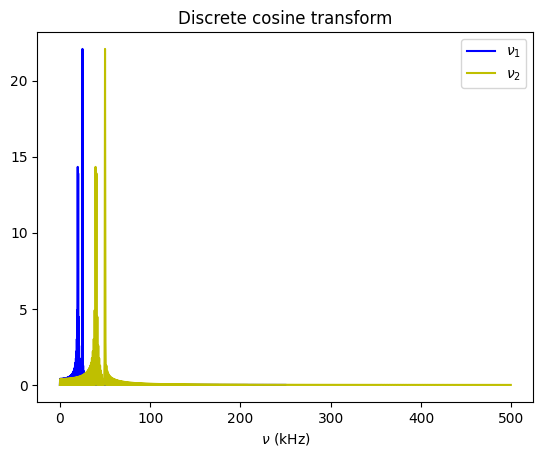

In [3]:
dnu1 = 1/(2*N*tau) #
dnu2 = 2/(2*N*tau)  
nu1 = np.linspace(0,(N-1)*dnu1,N)
nu2 = np.linspace(0,(N-1)*dnu2,N)
a=dct(f, norm='ortho')
plt.plot(nu1/1e3,np.abs(a),'b',label=r'$\nu_1$')
plt.plot(nu2/1e3,np.abs(a),'y',label=r'$\nu_2$')
plt.title('Discrete cosine transform')
plt.xlabel(r'$\nu$ (kHz)')
plt.legend()
plt.show()

## 2. Filtering noise.

### a

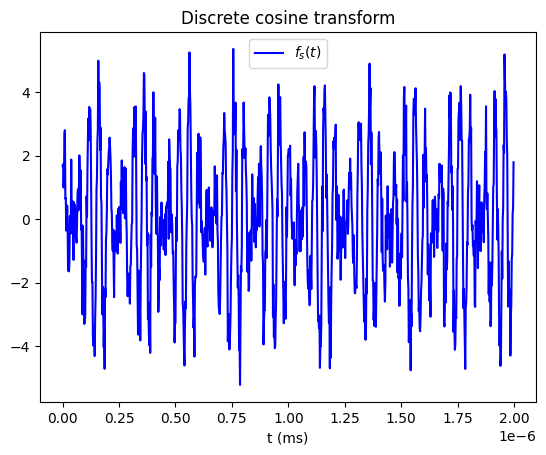

In [4]:
def fs(t):
  return np.sin(2*np.pi*nu1*t)+np.cos(2*np.pi*nu2*t)

nu1=20e3
nu2=25e3
N=1000
tau = 2e-6                       
t = np.linspace(0,(N-1)*tau,N)
f=fs(t)
rng = np.random.default_rng()
f_noisy = [f_i + rng.normal(0.,0.7) for f_i in f]
f_new=f+f_noisy
plt.plot(t/1e3,f_new, 'b',label=r'$f_s(t)$')
plt.legend()
plt.title('Discrete cosine transform')
plt.xlabel('t (ms)')
plt.show()

### b

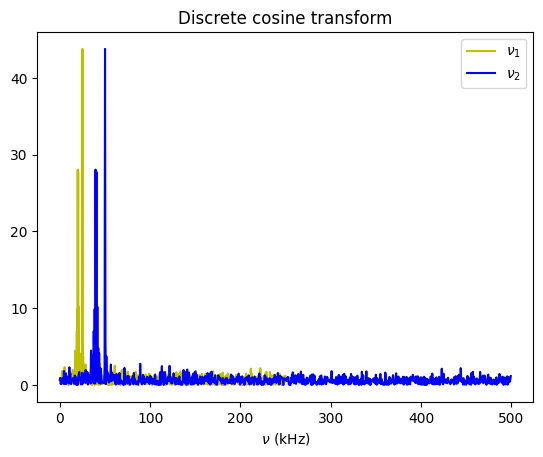

In [5]:
dnu1 = 1/(2*N*tau)
dnu2 = 2/(2*N*tau)  
nu1 = np.linspace(0,(N-1)*dnu1,N)
nu2 = np.linspace(0,(N-1)*dnu2,N)
a=dct(f_new, norm='ortho')
plt.plot(nu1/1e3,np.abs(a), 'y',label=r'$\nu_1$')
plt.plot(nu2/1e3,np.abs(a),'b',label=r'$\nu_2$')
plt.title('Discrete cosine transform')
plt.xlabel(r'$\nu$ (kHz)')
plt.legend()
plt.show()

### c

In [6]:
def fs(t, params):
  return np.sin(2*np.pi*nu1*t)+np.cos(2*np.pi*nu2*t)

nuMax1=50e3
nuMax2=75e3
nuMax3=100e3
params=[nuMax1,nuMax2,nuMax3]
rng = np.random.default_rng()
f_noisy = [f_i + rng.normal(0.,0.7) for f_i in f]

## 3. Relaxation-method program. 

Number of Iterations: 11439
V at center: 49.99898829048115


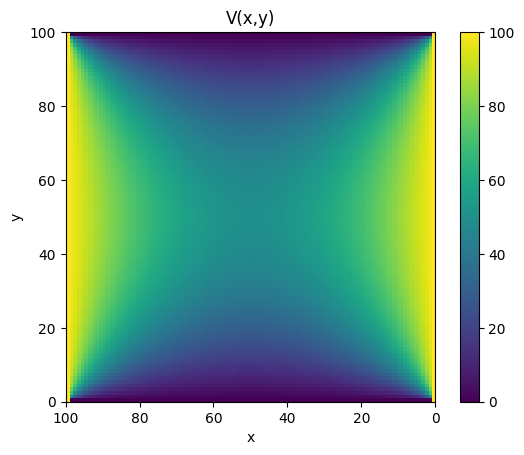

In [17]:
L = 100
N = 101
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
V = np.zeros((N, N))
rho = np.zeros((N, N))
V[0,:] = 0
V[-1,:] = 0
V[:,0] = 100
V[:,-1] = 100

tolerance = 1e-6
delta_V_max = 1e-4

delta_V = 1
iterations = 0
while delta_V > tolerance:
    V_old = V.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1]) - 0.25*rho[i,j]*(L/N)**2
    delta_V = np.max(np.abs(V - V_old))
    iterations += 1

center_index = N//2
print(f'Number of Iterations: {np.sum(iterations)}')
print(f"V at center: {V[center_index, center_index]}")

plt.imshow(V, origin='lower', extent=[L, 0, 0, L])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('V(x,y)')
plt.show()

## 4. Poisson Equation: finite charge density 

V at center: 266984494.6346973V


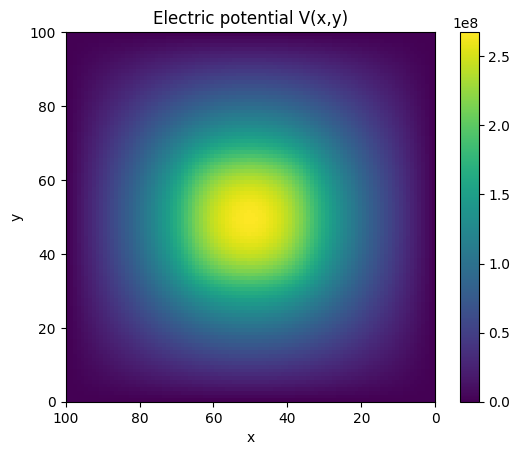

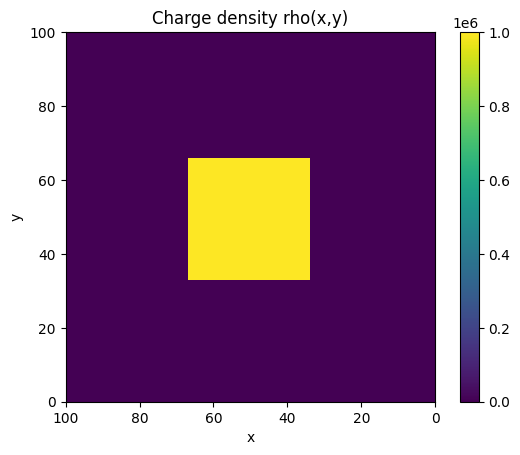

In [8]:
L = 100  
N = 100  
a = L/N  
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
V = np.zeros((N, N))  
V[0,:] = V[-1,:] = 0  
V[:,0] = V[:,-1] = 100  


rho0 = 1e6  
rho = np.zeros((N, N))
rho[N//3:2*N//3, N//3:2*N//3] = rho0

#vectorize this instead. Very important lesson. Works a lot faster.

delta_V_max = 1e-6 
maxiter = 10000  
for i in range(maxiter):
    V_old = V.copy()
    for j in range(1, N-1):
        for k in range(1, N-1):
            V[j,k] = 0.25*(V[j-1,k] + V[j+1,k] + V[j,k-1] + V[j,k+1] + a**2*rho[j,k])
    delta_V = np.max(np.abs(V - V_old))
    if delta_V < delta_V_max:
        print(f'Converged in {i} iterations with deltaV = {delta_V}')
        break

center_index = N//2
print(f"V at center: {V[center_index, center_index]}V")


plt.imshow(V, origin='lower', extent=(L, 0, 0, L))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric potential V(x,y)')
plt.show()


plt.imshow(rho, origin='lower', extent=(L, 0, 0, L))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Charge density rho(x,y)')
plt.show()

## 5. Plotting equipotentials.

### a

Number of Iterations: 11439
V at center: 49.99898829048115


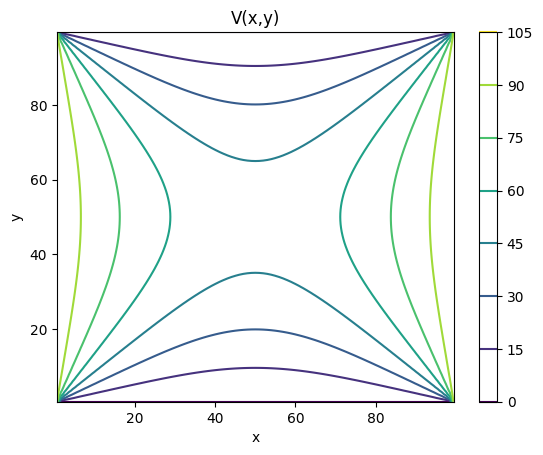

In [9]:
L = 100
N = 101
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
V = np.zeros((N, N))
rho = np.zeros((N, N))
V[0,:] = 0
V[-1,:] = 0
V[:,0] = 100
V[:,-1] = 100

tolerance = 1e-6
delta_V_max = 1e-4

delta_V = 1
iterations = 0
while delta_V > tolerance:
    V_old = V.copy()
    for i in range(1, N-1):
        for j in range(1, N-1):
            V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i,j-1]) - 0.25*rho[i,j]*(L/N)**2
    delta_V = np.max(np.abs(V - V_old))
    iterations += 1

center_index = N//2
print(f'Number of Iterations: {np.sum(iterations)}')
print(f"V at center: {V[center_index, center_index]}")

plt.contour(V, origin='lower', extent=[L, 0, 0, L])
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('V(x,y)')
plt.show()

### b

V at center: 266984494.6346973V


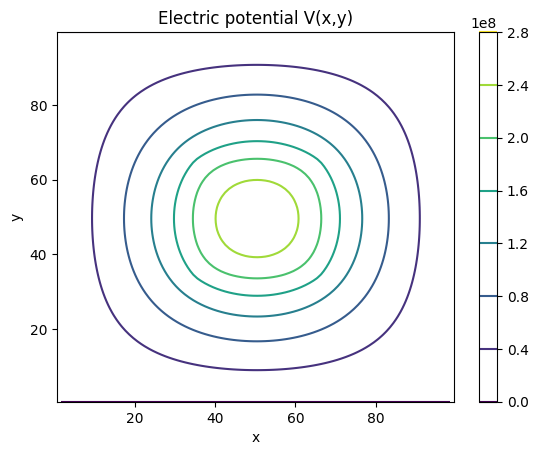

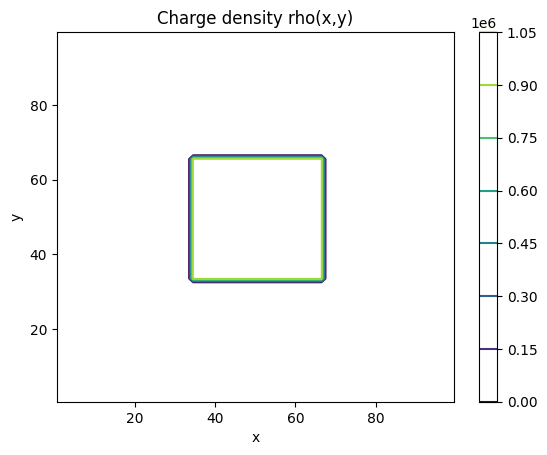

In [10]:
L = 100  
N = 100  
a = L/N  
x = np.linspace(0, L, N)
y = np.linspace(0, L, N)
X, Y = np.meshgrid(x, y)
V = np.zeros((N, N))  
V[0,:] = V[-1,:] = 0  
V[:,0] = V[:,-1] = 100  


rho0 = 1e6  
rho = np.zeros((N, N))
rho[N//3:2*N//3, N//3:2*N//3] = rho0


delta_V_max = 1e-6 
maxiter = 10000  
for i in range(maxiter):
    V_old = V.copy()
    for j in range(1, N-1):
        for k in range(1, N-1):
            V[j,k] = 0.25*(V[j-1,k] + V[j+1,k] + V[j,k-1] + V[j,k+1] + a**2*rho[j,k])
    delta_V = np.max(np.abs(V - V_old))
    if delta_V < delta_V_max:
        print(f'Converged in {i} iterations with deltaV = {delta_V}')
        break

center_index = N//2
print(f"V at center: {V[center_index, center_index]}V")


plt.contour(V, origin='lower', extent=(L, 0, 0, L))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric potential V(x,y)')
plt.show()


plt.contour(rho, origin='lower', extent=(L, 0, 0, L))
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Charge density rho(x,y)')
plt.show()

## 7. Newman Ex. 9.3: Parallel-plate capacitor.

### a

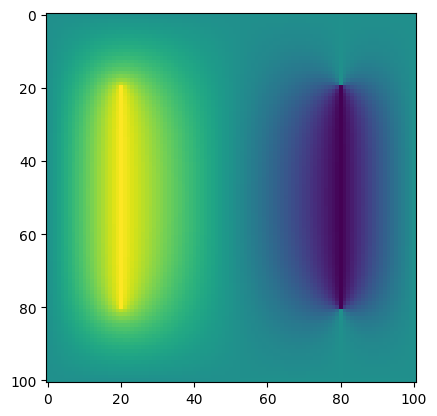

In [11]:
# Constants
V = 1.0  # volts
a = 0.1  # grid spacing in centimeters
L = 100  # number of grid points
delta = 10 ** -6  # volts
omega = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b



max_diff = 2 * delta

phi = np.zeros([L + 1, L + 1], float)
phi[20:81, 20] = V
phi[20:81, 80] = -V
while max_diff > delta:

    max_diff = 0.0
    for i in range(L + 1):
        for j in range(L + 1):
            if not i == 0 and not j == 0 and not i == L and not j == L and not (20 <= i <= 80 and j == 20 or j == 80):
                old_phi = phi[i,j]
                new_phi = (1 + omega) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - omega * old_phi
                phi[i, j] = new_phi

                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)


plt.imshow(phi)
plt.show()

### b

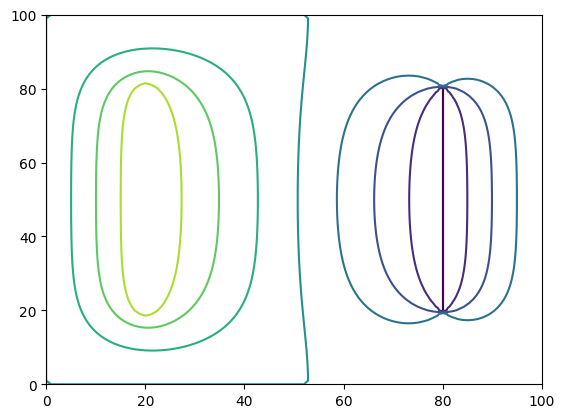

In [12]:
# Constants
V = 1.0  # volts
a = 0.1  # grid spacing in centimeters
L = 100  # number of grid points
delta = 10 ** -6  # volts
omega = 0.9

def larger(a, b):
    if a >= b:
        return a
    else:
        return b



max_diff = 2 * delta

phi = np.zeros([L + 1, L + 1], float)
phi[20:81, 20] = V
phi[20:81, 80] = -V
while max_diff > delta:
  
    max_diff = 0.0
    for i in range(L + 1):
        for j in range(L + 1):
            if not i == 0 and not j == 0 and not i == L and not j == L and not (20 <= i <= 80 and j == 20 or j == 80):
                old_phi = phi[i,j]
                new_phi = (1 + omega) * (phi[i + 1, j] + phi[i - 1, j] + phi[i, j + 1] + phi[i, j - 1]) / 4 \
                          - omega * old_phi
                phi[i, j] = new_phi

                max_diff = larger(max_diff, abs(new_phi - old_phi))
    # print("max_diff = ", max_diff)

plt.contour(phi)
plt.show()